In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df_raw=pd.read_csv("../amazon_cells_labelled.txt", sep="\t|\n", engine='python', header=None)
df_raw.columns = ['review', 'positive']

In [182]:
# pd.describe_option('display') - see the display options 
pd.set_option('colheader_justify', 'left')
pd.set_option('display.max_colwidth', 150)

In [183]:
df_raw.iloc[40:60]

,review,positive
40,"It has a great camera thats 2MP, and the pics are nice and clear with great picture quality.",1
41,I was not impressed by this product.,0
42,Nice headset priced right.,1
43,I only hear garbage for audio.,0
44,Excellent bluetooth headset.,1
45,It has all the features I want,1
46,Who in their right mind is gonna buy this battery?.,0
47,AFTER ARGUING WITH VERIZON REGARDING THE DROPPED CALLS WE RETURNED THE PHONES AFTER TWO DAYS.,0
48,This case seems well made.,1
49,Disappointed with battery.,0


In [184]:
positive_keywords = ['great', 'nice', 'good', 'love', 'fine', 'ideal', 'recommend', 'highly', '5+', '5 stars', 'excellent']

for key in positive_keywords:
    df_raw[str(key)] = df_raw.review.str.contains(
        ' ' + str(key), 
        case=False)

In [185]:
negative_keywords = ["doesn't", 'poor', 'not', 'unusable', 'unacceptible', 'problem', 'issue', 'not very', '1 star', 'fool', 'DISAPPOINTED', 'bad', 'garbage']

for key in negative_keywords:
    df_raw[str(key)] = df_raw.review.str.contains(
        ' ' + str(key), 
        case=False)

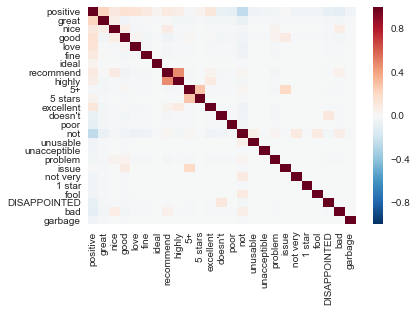

In [186]:
sns.heatmap(df_raw.corr()) # we see that 'recommend' and 'highly' are strongly correlated. same for 5+ and 5 stars
df_rev = df_raw.drop(['highly','5+'], axis=1) #drop highly and 5+ (ambiguous)

In [187]:
df_rev.columns
positive_keywords.remove('highly')
positive_keywords.remove('5+')

In [188]:
data = df_rev[positive_keywords + negative_keywords]
target = df_rev['positive']

In [189]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

# Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 348


In [190]:
df_test = pd.read_csv("../yelp_labelled.txt", sep="\t|\n", engine='python', header=None)
df_test.columns = ['review', 'positive']

In [191]:
#all_keywords = positive_keywords + negative_keywords
for key in positive_keywords + negative_keywords:
    df_test[str(key)] = df_test.review.str.contains(
        ' ' + str(key), 
        case=False)

In [192]:
target_test = df_test['positive']
data = df_test[positive_keywords + negative_keywords]

In [193]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

# Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 481
